<a href="https://colab.research.google.com/github/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/Cherukupally_Manasa_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

In [1]:
#importing the data
import pandas as pd
df=pd.read_csv('/content/Cherukupally_Abstract_Sentiments.csv')
print(df)

                                     paperId  \
0   f9c602cc436a9ea2f9e7db48c77d924e09ce3c32   
1   46200b99c40e8586c8a0f588488ab6414119fb28   
2   9c9d7247f8c51ec5a02b0d911d1d7b9e8160495d   
3   f9c990b1b5724e50e5632b94fdb7484ece8a6ce7   
4   9f5b82d9915d0752957602224c5056be7e749c83   
..                                       ...   
95  175e37bca3762b3a52c6a0e153060b98a251d061   
96  88a97c8ef539589c55a6fe869c243792e470d6a3   
97  fbf9812f29156024ec693b4633a21303eead309d   
98  1b0f4bd3872bb590d457990ac2b26b29f770fc44   
99  ac644a74a0ebc8cfbe1b0af8120004909828d283   

                                     Cleaned_abstract Abstract_Sentiment  
0   we present fashionmnist new dataset compris 28...           Positive  
1   tensorflow machin learn system oper larg scale...           Positive  
2   tensorflow interfac express machin learn algor...           Positive  
3   the goal precipit nowcast predict futur rainfa...           Negative  
4   understand machin learningprobabilist machin

In [2]:
pip install pyspellchecker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.8 MB/s eta 0:00:00


In [3]:
#Checking for the spellings int he Text

from spellchecker import SpellChecker

#initializing
spell = SpellChecker()

# Function to correct spelling
def correct_spell(text):
    correct_words = []
    words = text.split()  # Split text
    for word in words:
        correct_word = spell.correction(word)
        if correct_word is not None:
            correct_words.append(correct_word)
    return ' '.join(correct_words)  # Join corrected words

# Apply the function
df['Cleaned_abstract'] = df['Cleaned_abstract'].apply(correct_spell)



# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [4]:
#Creating corpus for LDA Topic modeling

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

data = df['Cleaned_abstract'].values.tolist()

# Tokenization
data_words = [simple_preprocess(text, deacc=True) for text in data]

# Create dictionary and corpus
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]


In [5]:
# LDA model
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42)

# Get top 10 clusters
top_clusters = lda_model.show_topics(num_topics=10, num_words=10)

# Summarizing and describe the 10 topics
for i, (topic_num, words) in enumerate(top_clusters):
    print(f"Topic {topic_num}:")
    print(words)
    print()

Topic 0:
0.025*"learn" + 0.024*"data" + 0.020*"machine" + 0.010*"use" + 0.010*"model" + 0.009*"network" + 0.009*"method" + 0.008*"algorithm" + 0.008*"neural" + 0.008*"value"

Topic 1:
0.026*"learn" + 0.020*"machine" + 0.012*"interpret" + 0.012*"use" + 0.010*"model" + 0.010*"method" + 0.008*"data" + 0.008*"we" + 0.008*"apply" + 0.007*"sum"

Topic 2:
0.036*"model" + 0.022*"learn" + 0.017*"train" + 0.015*"attack" + 0.014*"machine" + 0.012*"data" + 0.012*"use" + 0.011*"adversary" + 0.008*"example" + 0.007*"algorithm"

Topic 3:
0.019*"machine" + 0.017*"learn" + 0.012*"problem" + 0.010*"model" + 0.009*"data" + 0.007*"precinct" + 0.007*"podcast" + 0.006*"the" + 0.006*"use" + 0.006*"classic"

Topic 4:
0.030*"learn" + 0.019*"machine" + 0.016*"data" + 0.013*"use" + 0.013*"model" + 0.012*"we" + 0.011*"method" + 0.009*"train" + 0.008*"the" + 0.008*"research"

Topic 5:
0.027*"learn" + 0.026*"machine" + 0.015*"model" + 0.011*"apply" + 0.010*"use" + 0.009*"data" + 0.009*"method" + 0.009*"algorithm" +

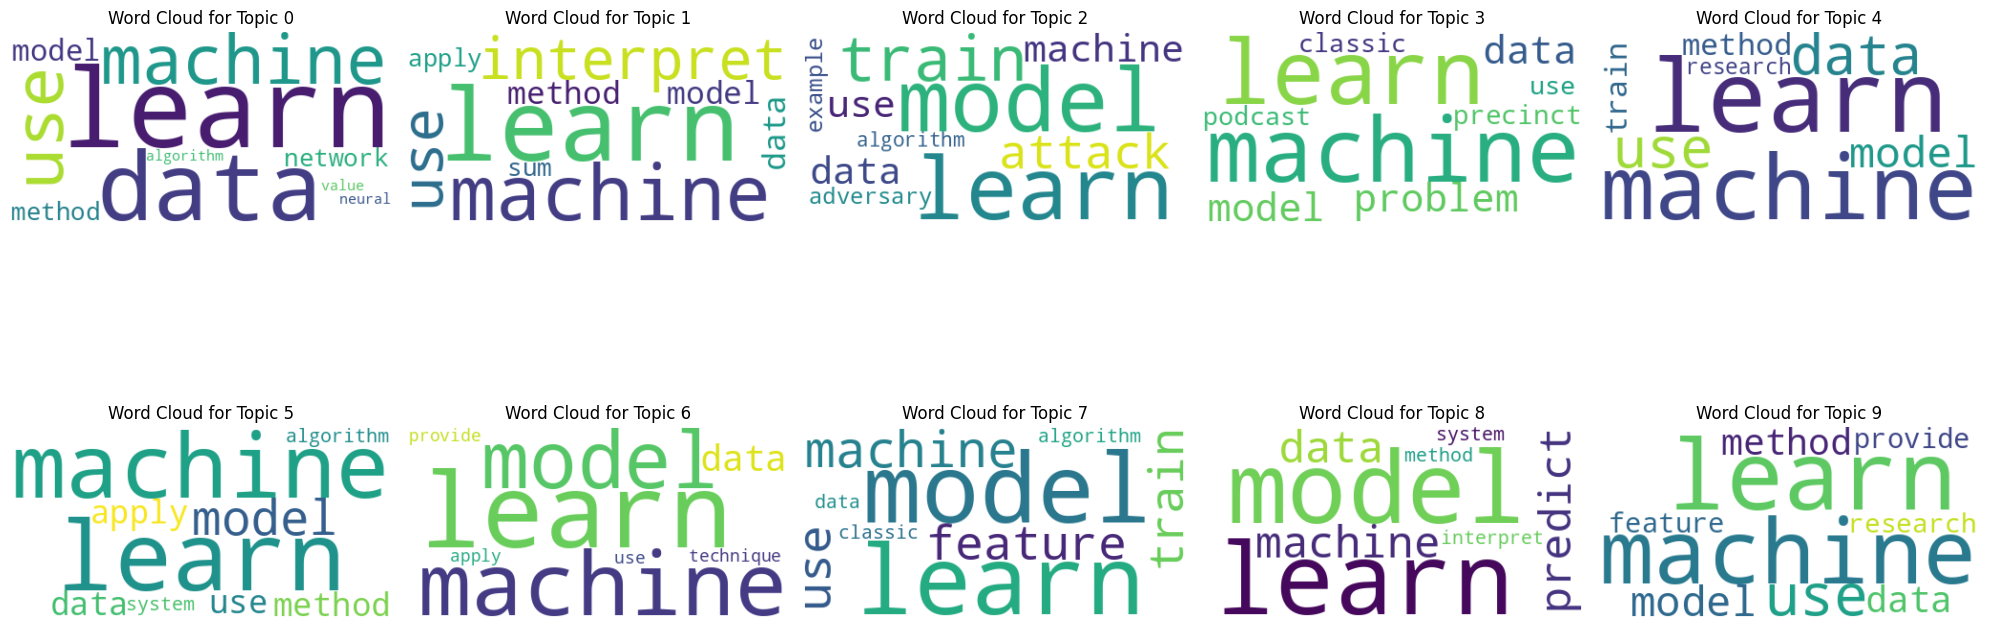

In [6]:
#Creating the word cloud for Topic visualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming top_clusters contains the top topics and words as in the previous code
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, (topic_num, words) in enumerate(top_clusters):
    row = i // 5
    col = i % 5

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(words)

    axes[row, col].imshow(wordcloud, interpolation='bilinear')
    axes[row, col].set_title(f"Word Cloud for Topic {topic_num}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()



**Topics   and summary**

Topic-0 - use machine learning algorithm on data

Topic-1 - Apply research method to train machine learning model

Topic-2 - classic machine learning methods were used

Topic-3 - Explain machine learning model approach

Topic-4 - use machine learning model on data to get features and graphs

Topic-5 - interpret the data

Topic-6 - compute adversary data attack using machine learning

Topic-7 - Learn privacy methods

Topic-8 - use of quantum model to compute data

Topic-9 - train machine learning models

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

'\nThe features I have used for sentiment classification is \n1. tf-idf features- tf-idf features are used because,it gives the information\n   about the term frequencies and the inverse dcument ferequency which is \n   important while working with documents as it givens entire scope of the text.\n   \n2. sentiment scores of the words in the document- This feature is used because \n   while classifying sentiments it is important to know the sentents of the \n   words used in each abstract. Hence, sentiment score feature is used.\n'


**The features I have used for sentiment classification is **
1. tf-idf features- tf-idf features are used because,it gives the information
   about the term frequencies and the inverse dcument ferequency which is
   important while working with documents as it givens entire scope of the text.
   
2. sentiment scores of the words in the document- This feature is used because
   while classifying sentiments it is important to know the sentents of the
   words used in each abstract. Hence, sentiment score feature is used.


In [9]:
pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 983.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=242111c4ea8a0be2e6be0ee5eb7004d95b925fb21db52d50fa2ffae466c50d53
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from afinn import Afinn
import pandas as pd
import numpy as np


X = df['Cleaned_abstract']
y = df['Abstract_Sentiment']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the AFINN sentiment analyzer
afinn = Afinn()

# Calculate sentiment scores
sent_scores_train = [afinn.score(text) for text in X_train]

# Calculate sentiment scores for testing set
sent_scores_test = [afinn.score(text) for text in X_test]

# Use TF-IDF to represent the text data
tfidf_vect = TfidfVectorizer(max_features=100)  # You can adjust max_features as needed
X_train_vectorized = tfidf_vect.fit_transform(X_train)
X_test_vectorized = tfidf_vect.transform(X_test)

# Combine sentiment scores with TF-IDF features
combined_feat_train = X_train_vectorized.toarray()
combined_feat_train = np.column_stack((combined_feat_train, sent_scores_train))

combined_feat_test = X_test_vectorized.toarray()
combined_feat_test = np.column_stack((combined_feat_test, sent_scores_test))
print(combined_feat_test)

# Logistic Regression Classifier
lr_c = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr_c.fit(combined_feat_train, y_train)
lr_scores = cross_val_score(lr_c, combined_feat_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", lr_scores)
lr_predictions = lr_c.predict(combined_feat_test)

# Random Forest Classifier
rf_c = RandomForestClassifier(random_state=42)
rf_c.fit(combined_feat_train, y_train)
rf_scores = cross_val_score(rf_c, combined_feat_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
rf_predictions = rf_c.predict(combined_feat_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Display results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
})
print(results)



[[ 0.          0.09654774  0.         ...  0.          0.
   3.        ]
 [ 0.          0.          0.         ...  0.          0.
   4.        ]
 [ 0.          0.          0.         ...  0.          0.07107265
  -9.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   2.        ]
 [ 0.          0.          0.         ...  0.          0.
   3.        ]
 [ 0.          0.66590706  0.         ...  0.          0.
  -4.        ]]
Logistic Regression Cross-Validation Scores: [0.6875 0.875  0.75   0.8125 0.75  ]
Random Forest Cross-Validation Scores: [0.75  0.875 0.75  0.75  0.75 ]
      Metric  Logistic Regression  Random Forest
0   Accuracy             0.600000       0.700000
1  Precision             0.541667       0.750000
2     Recall             0.600000       0.700000
3   F1 Score             0.517778       0.635556


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above analysis, Accuracy: 70% and F1-score 63% of Random Forest is more than Logistic Regression that is Accuracy: 60% and F1-score: 51%

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [11]:
#Loading Traina and Test data

train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')
print(train_data.head())
print(train_data.info())
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis=1,inplace=True)

print(train_data.YrSold.min)
print(train_data.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

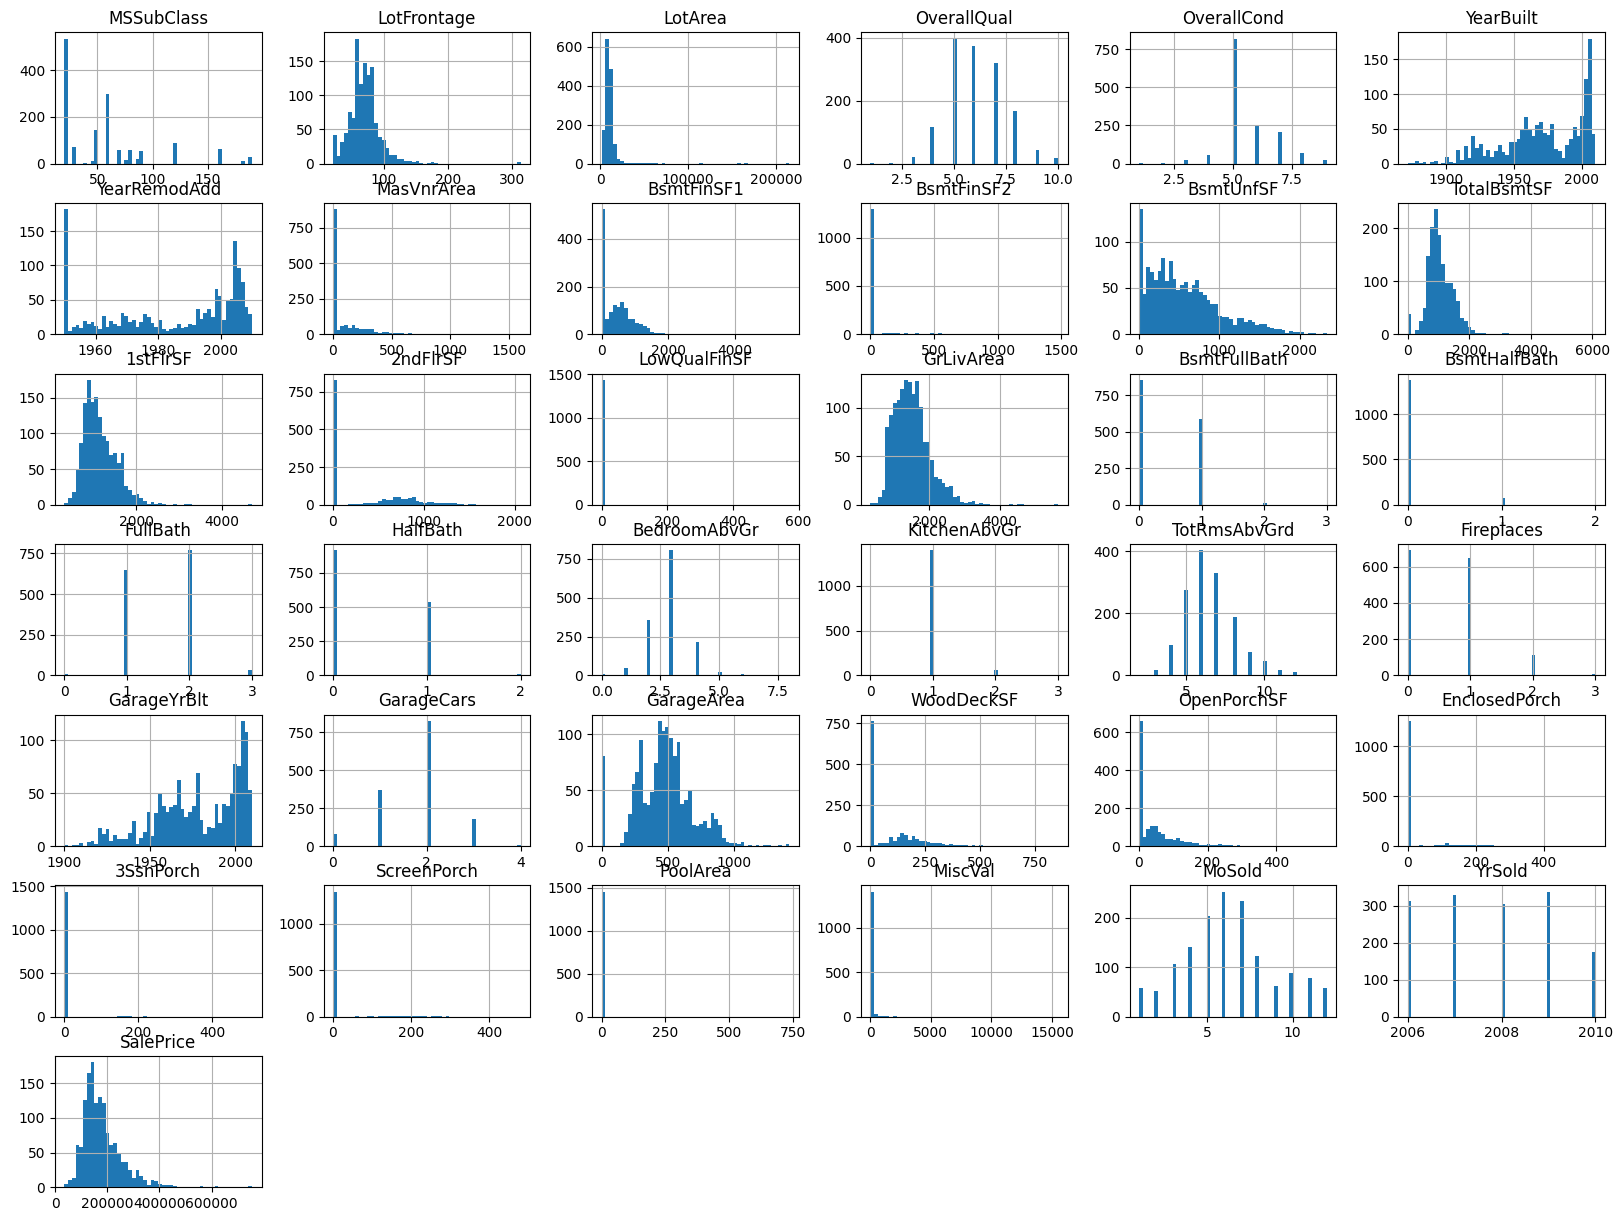

In [12]:
#Data visualization
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [13]:
#Removing missing values

# Filter columns with null
null_counts = train_data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = train_data.select_dtypes(include='number').columns.tolist()
categorical_cols = train_data.select_dtypes(exclude='number').columns.tolist()

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
train_data[numeric_cols] = numeric_imputer.fit_transform(train_data[numeric_cols])

# Impute missing values in categorical columns with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = categorical_imputer.fit_transform(train_data[categorical_cols])

print(train_data)

# check for the count of null values in each column after removal
null_counts = train_data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)



LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1           20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2           60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3           70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4           60.0       RL         84.0  14260.0   Pave  Grvl      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455        60.0       RL         62.0   7917.0   Pave  Grvl      Reg   
1456

In [14]:
#Removing missing values in Test_data

print(test_data)

# Filter columns with null counts
null_counts = test_data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = test_data.select_dtypes(include='number').columns.tolist()
categorical_cols = test_data.select_dtypes(exclude='number').columns.tolist()

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
test_data[numeric_cols] = numeric_imputer.fit_transform(test_data[numeric_cols])

# Impute missing values in categorical columns with the mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_data[categorical_cols] = categorical_imputer.fit_transform(test_data[categorical_cols])

print(test_data)

# Check after removal
null_counts = test_data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...  

In [15]:
#Removing unwanted columns
train_data.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley' ],axis=1, inplace=True)
print(train_data)



      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
1           20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
2           60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
3           70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
4           60.0       RL         84.0  14260.0   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455        60.0       RL         62.0   7917.0   Pave      Reg         Lvl   
1456        20.0       RL         85.0  13175.0   Pave      Reg         Lvl   
1457        70.0       RL         66.0   9042.0   Pave      Reg         Lvl   
1458        20.0       RL         68.0   9717.0   Pave      Reg         Lvl   
1459        20.0       RL         75.0   9937.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPor

In [16]:
#Removing unwanted columns in test data
test_data.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley' ],axis=1, inplace=True)
print(test_data)


      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           20.0       RH         80.0  11622.0   Pave      Reg         Lvl   
1           20.0       RL         81.0  14267.0   Pave      IR1         Lvl   
2           60.0       RL         74.0  13830.0   Pave      IR1         Lvl   
3           60.0       RL         78.0   9978.0   Pave      IR1         Lvl   
4          120.0       RL         43.0   5005.0   Pave      IR1         HLS   
...          ...      ...          ...      ...    ...      ...         ...   
1454       160.0       RM         21.0   1936.0   Pave      Reg         Lvl   
1455       160.0       RM         21.0   1894.0   Pave      Reg         Lvl   
1456        20.0       RL        160.0  20000.0   Pave      Reg         Lvl   
1457        85.0       RL         62.0  10441.0   Pave      Reg         Lvl   
1458        60.0       RL         74.0   9627.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF

In [17]:
#Finding the correlation between columns

corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

<ipython-input-17-6e754fbaa110>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

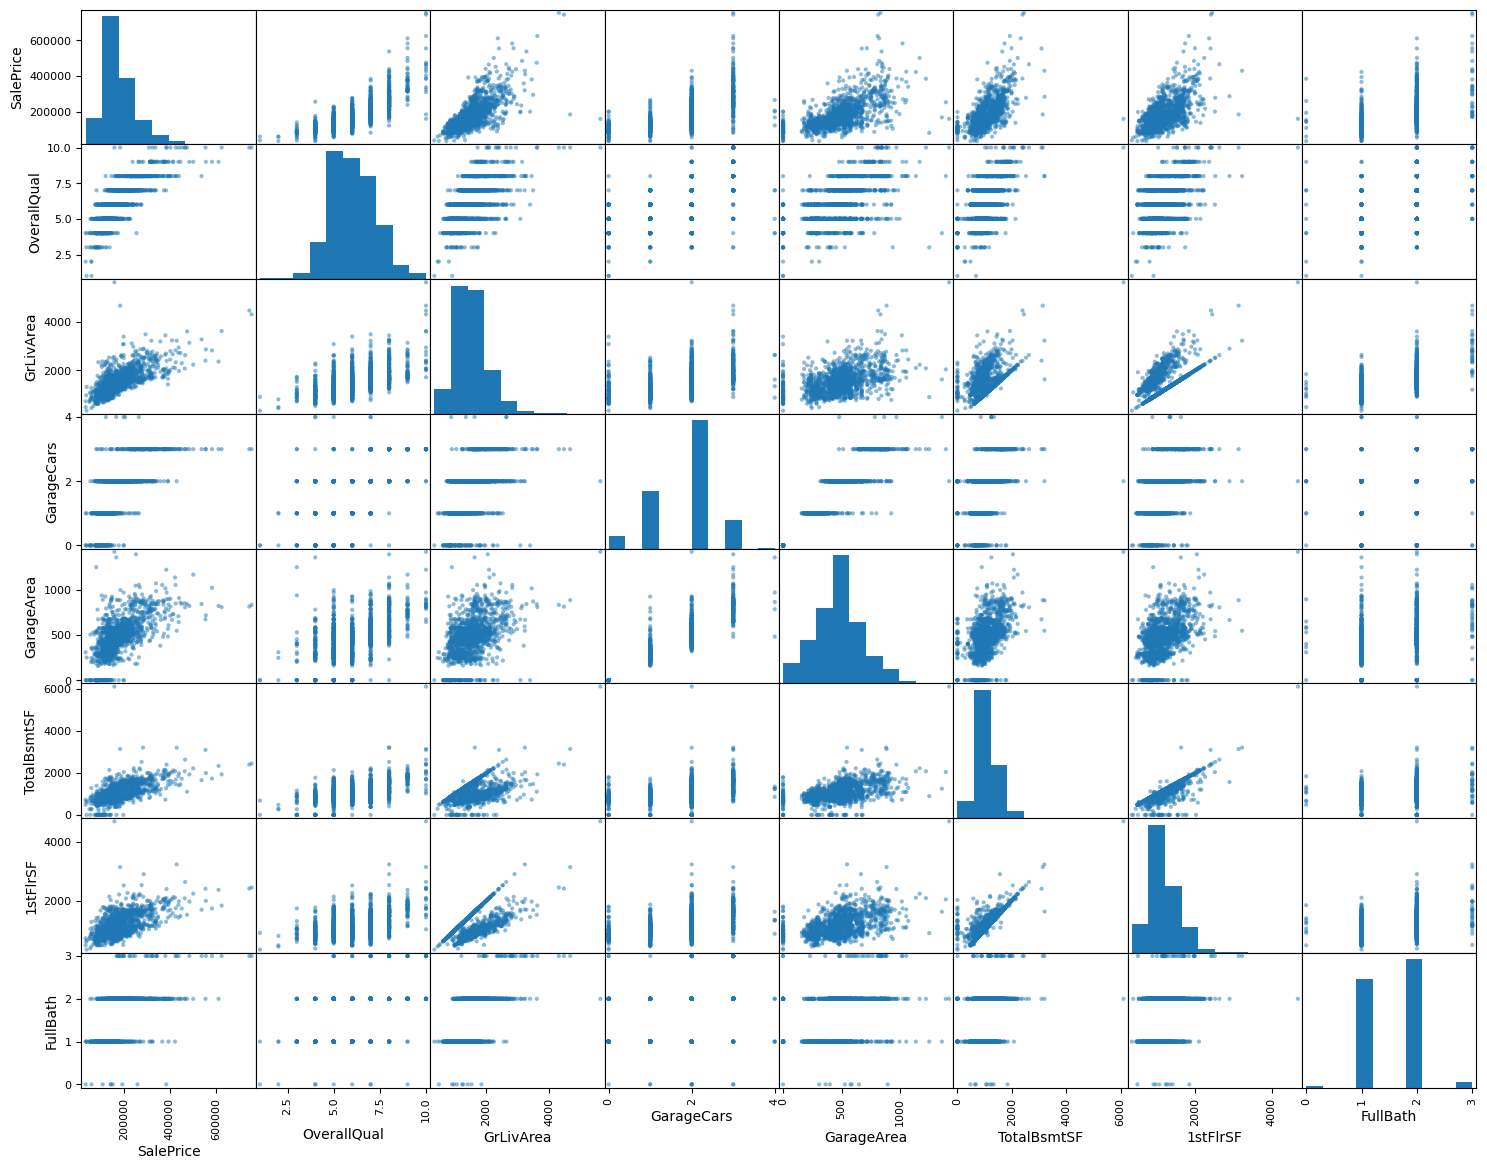

In [18]:
#Scatter plot

from pandas.plotting import scatter_matrix

attributes = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath']
scatter_matrix(train_data[attributes], figsize=(18, 14))
plt.savefig('matrix.png')

In [19]:
#Encoding the Object columns

from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'categorical_columns' is a list of column names with object dtype
label_encoder = LabelEncoder()
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if train_data[column].dtype == 'object':
        train_data[column] = label_encoder.fit_transform(train_data[column])
print(train_data)




      MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0           60.0         3         65.0   8450.0       1         3   
1           20.0         3         80.0   9600.0       1         3   
2           60.0         3         68.0  11250.0       1         0   
3           70.0         3         60.0   9550.0       1         0   
4           60.0         3         84.0  14260.0       1         0   
...          ...       ...          ...      ...     ...       ...   
1455        60.0         3         62.0   7917.0       1         3   
1456        20.0         3         85.0  13175.0       1         3   
1457        70.0         3         66.0   9042.0       1         3   
1458        20.0         3         68.0   9717.0       1         3   
1459        20.0         3         75.0   9937.0       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...            0.0   
1          

In [20]:
#Spliting the data
from sklearn.model_selection import train_test_split
y=pd.DataFrame(train_data['SalePrice'])
X=pd.DataFrame(train_data.drop(['SalePrice'],axis=1))

# Assuming 'X' is your feature data and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)
print(pd.DataFrame(y_pred))

# Assuming 'y_test' is your true target values and 'y_pred' is your predicted values
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r_squared)


<ipython-input-20-6b0289e1a285>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


             0
0    140978.00
1    325809.95
2    115737.00
3    164628.40
4    322979.41
..         ...
287  122474.25
288  237273.43
289  176371.85
290  132869.71
291  116784.50

[292 rows x 1 columns]
Mean Squared Error: 782190312.5441539
R-squared: 0.8980238530388397


In [21]:
#Predicting the Test data

from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'categorical_columns' is a list of column names with object dtype
label_encoder = LabelEncoder()
categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    if test_data[column].dtype == 'object':
        test_data[column] = label_encoder.fit_transform(test_data[column])

# Predictions
test_pred = rf_regressor.predict(test_data)
print(pd.DataFrame(test_pred))

              0
0     128294.50
1     154055.25
2     178458.35
3     188682.90
4     210015.12
...         ...
1454   88100.50
1455   91257.00
1456  152758.24
1457  118998.50
1458  225689.97

[1459 rows x 1 columns]


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [23]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.model_selection import train_test_split

X = df['Cleaned_abstract']
y = df['Abstract_Sentiment']


# Mapping the labels
label_map = {'Positive': 1, 'Negative': 0, 'Neutral': 2}

# Replacing string labels
y = y.replace(label_map)


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizing and encoding the train text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encode_train_data = [tokenizer.encode(text, add_special_tokens=True) for text in X_train]
pad_train_data = torch.nn.utils.rnn.pad_sequence([torch.tensor(seq) for seq in encode_train_data], batch_first=True, padding_value=tokenizer.pad_token_id)

# Tokenizing and encoding the test text data
encode_test_data = [tokenizer.encode(text, add_special_tokens=True) for text in X_test]
pad_test_data = torch.nn.utils.rnn.pad_sequence([torch.tensor(seq) for seq in encode_test_data], batch_first=True, padding_value=tokenizer.pad_token_id)

# Convert label columns to NumPy arrays
y_train_array = y_train.values.astype(int)  # Convert labels to integer type
y_test_array = y_test.values.astype(int)    # Convert labels to integer type

# Creating TensorDatasets and DataLoaders
train_dataset = TensorDataset(pad_train_data, torch.tensor(y_train_array))
train_dataloader = DataLoader(train_dataset, batch_size=32)

test_dataset = TensorDataset(pad_test_data, torch.tensor(y_test_array))
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Loading pre-trained BERT b_model for sequence classification
b_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Training the b_model
optimizer = torch.optim.Adam(b_model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

epochs = 1
for epoch in range(epochs):
    for batch in train_dataloader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = b_model(inputs)[0]
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [25]:
#Model Evalaution

from sklearn.metrics import accuracy_score, classification_report

# Evaluation loop
b_model.eval()
predicted_labels = []
true_labels = []

for batch in test_dataloader:
    inputs, labels = batch
    with torch.no_grad():
        outputs = b_model(inputs)[0]
    _, predicted = torch.max(outputs, 1)  # Getting the predicted class
    predicted_labels.extend(predicted.tolist())
    true_labels.extend(labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Classification report for precision, recall, and F1-score
class_names = ['Negative', 'Positive', 'Neutral']  # Assuming order corresponds to labels 0, 1, 2
classif_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(classif_rep)


Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         7
    Positive       0.60      1.00      0.75        12
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.60        20
   macro avg       0.20      0.33      0.25        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



**BERT:**
We have used huggingface's BERT (Bidirectional Encoder Representations from Transformers) which is a LLM model developed by Google. Since we are dealing with textual data BERT is the decent model to be applied. Our data is the labeled data, hence BertForSequenceClassification, which is a classification model of BERT is used. BERT is a transformers based model and has self-attention feature. The parameters in BERT are number of layers, hidden units, attention heads,batch size,epoch are significant parameters.


**Key metrics:** The key metrics of our model include Accuracy, Precision, Recall, F1-score,Computational Efficiency.
The accuracy of the model is 60%.
**Precision:**
For the class 'Negative', the precision is 0.00.
For the class 'Positive', the precision is 0.60.
For the class 'Neutral', the precision is 0.00.
**F1-Score:**
For the class 'Negative', the F1-score is 0.00.
For the class 'Positive', the F1-score is 0.75.
For the class 'Neutral', the F1-score is also 0.00.

**Strengths:** Since BERT is bidirectional, it can easily provide contexual information of the text. Fine-tuning BERT gives remarkable results. It can be effectively used for NLP tasks.

**Limitations:** The limitations of BERT is expensive computation, high memory requirement.

**Challenges**: the challenges I faced while using BERT is high memory requirement. It need high computation power which is lacking with me.

**Strategies for Improvement:** Transfer learning can be used to improve. Other variants of BERT that requires less computational power can be used.